___
# <CENTER> LINEAR DISCRIMINATE ANALYSIS

<center>  Maximizing the separability among known classes.
    
___

# <center> Principal Component Analysis and Linear Discriminate Analysis
___
#### <center> PCA
<center> When we consider the goals of PCA we are instantly drawn to the idea dimentionality reduction and of feature classification. The algorithym aims to find the most accurate data representation in a lower dimensional space spanned by the maximum variance directions. Notably, these principal axis might not be the best starting point for classification tasks.
$$$$
    
#### <center> LDA
<center> Constrastly, LDA only tries to provide more class separability and draw a decision region between the given classes. Maximizing the separability among known classes. This method also helps to better understand the distribution of the feature data.
    
___

## <center> Intuition using two classes

<center> Given a training set  $x_1, . . . , x_n \in R^d$ consisting of two classes $k_1$, $k_2$, we want to find a new axis that best discriminates between our two classes. Maximizes the separability among our two classes.
    
___


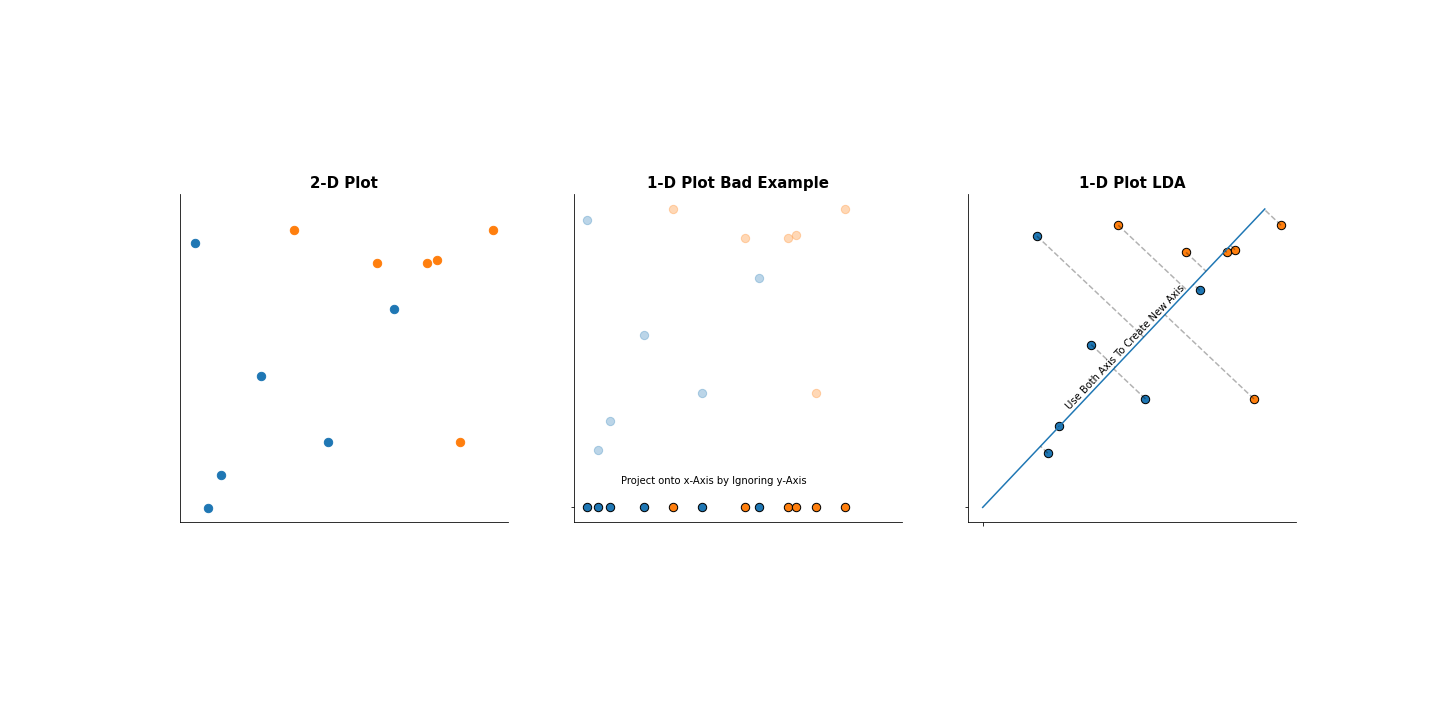

In [139]:
Image('LDAexamplePlots.png')

___
## <center> So how does LDA create this new axis?
<center> LDA projects the data ontp the new axis in a way to maximize the separation of the two classes
    
___


#### <center> This new axis is created based upon two criteria:
1. Maximising the distance between the means.


2. Minimizing the variation (LDA calls "scatter") within each category.
___
#### <center> More formally:

$$max\frac{(\mu_1 - \mu_2)^2}{s_1^{2}+s_2^{2}}$$
___
Where our optimal axis should be such that:

- $(\mu_1 - \mu_2)^2$ is large.


- $s_1^{2}+s_2^{2}$ is small
___
#### <center> Notably the 1-D projection of our points $x_i$ onto our vector v is denoted as:

$$a_i = v^Tx_i$$

___
## <center> Measuring the distance in our 1-D space
___
#### <center> An idea is to measure the distance between the two class means in the 1D projection space:

$$|\mu_1 - \mu_2|$$
___

$$\mu_1 = \frac{1}{n_1}\sum_{x_i\in k_1}{}$$
    
___
$$a_i = \frac{1}{n_1}\sum_{x_i\in k_1}{}v^Tx_i$$

    
$$v^T.\frac{1}{n_1}\sum_{x_i\in k_1}{}x_i$$

    
$$=v^Tm_1$$
___

$$\mu_2 = v^Tm_2$$
___
<center> Basically, we are projecting our $x_i$ onto our v vector and then measuring the mean distance of our projection, notably the difference between our means:


$$max|\mu_1 - \mu_2|$$
___

## <center> Maximizing mean difference is not the best seperator
___

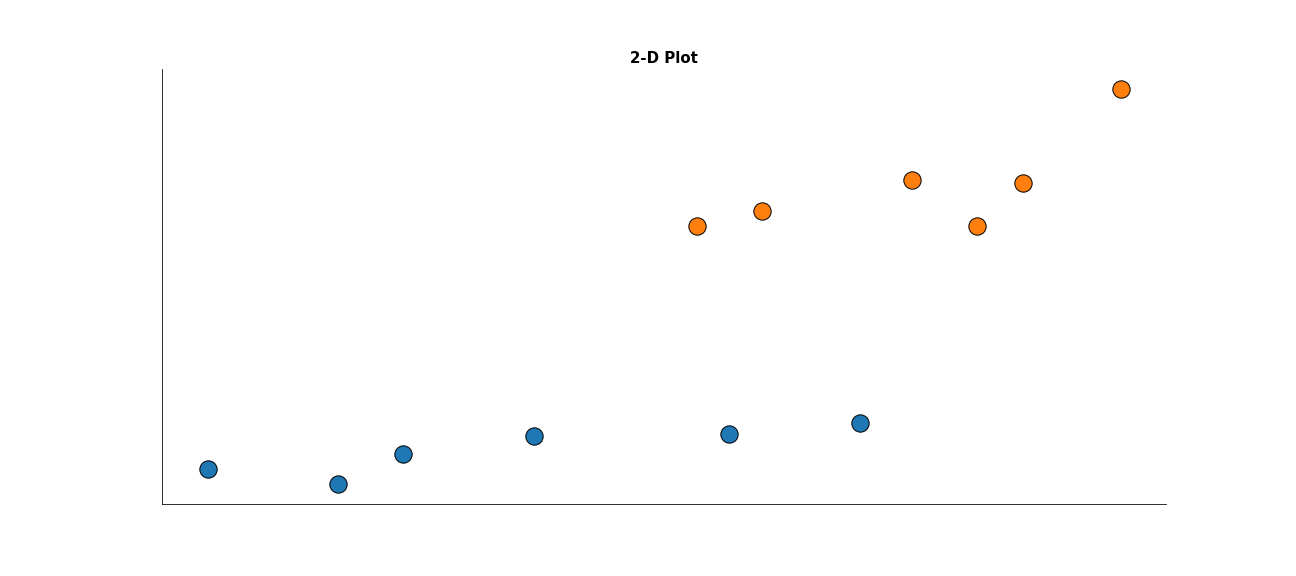

In [735]:
Image('LDA2Dplot.png')

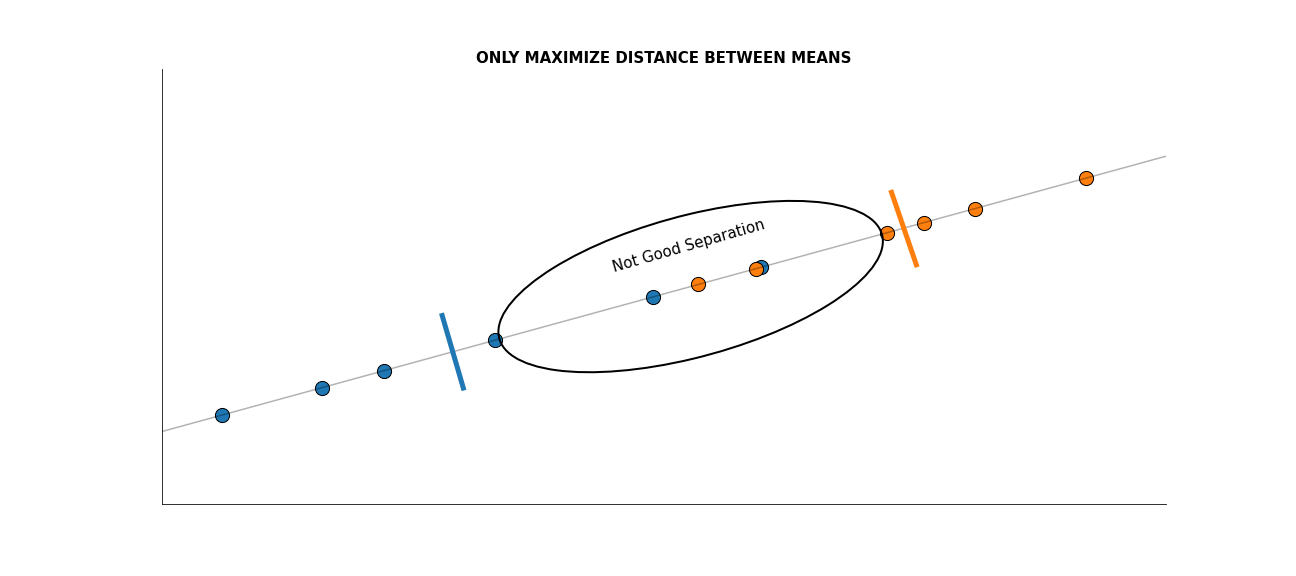

In [737]:
Image('LDANotSep.png')

___
## <center> Variances of Projections

<center> WE NEED TO CONSIDER THE SPREAD/VARIANCE OF THE PROJECTED CLASSES:
    
___

$$s_1^2 = \sum_{x_i\in k_1}{}(a_i - \mu_1)^2$$


$$s_2^2 = \sum_{x_i\in k_2}{}(a_i - \mu_2)^2$$
___
Now we are left with:

$$max\frac{(\mu_1 - \mu_2)^2}{s_1^{2}+s_2^{2}}$$
___

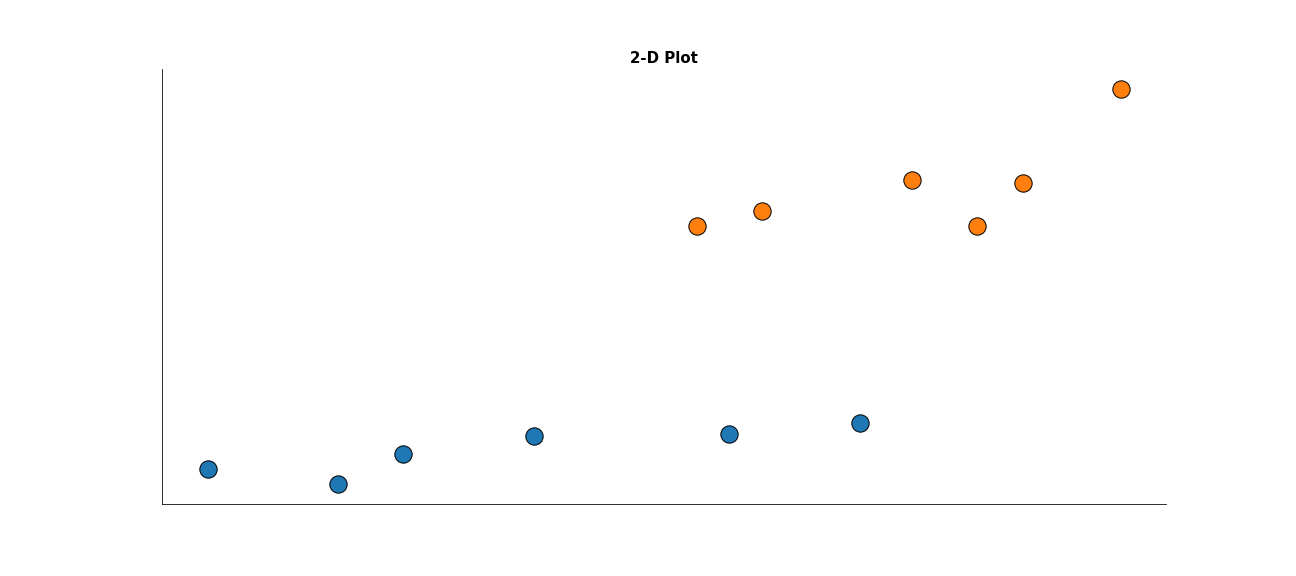

In [740]:
Image('LDA2Dplot.png')

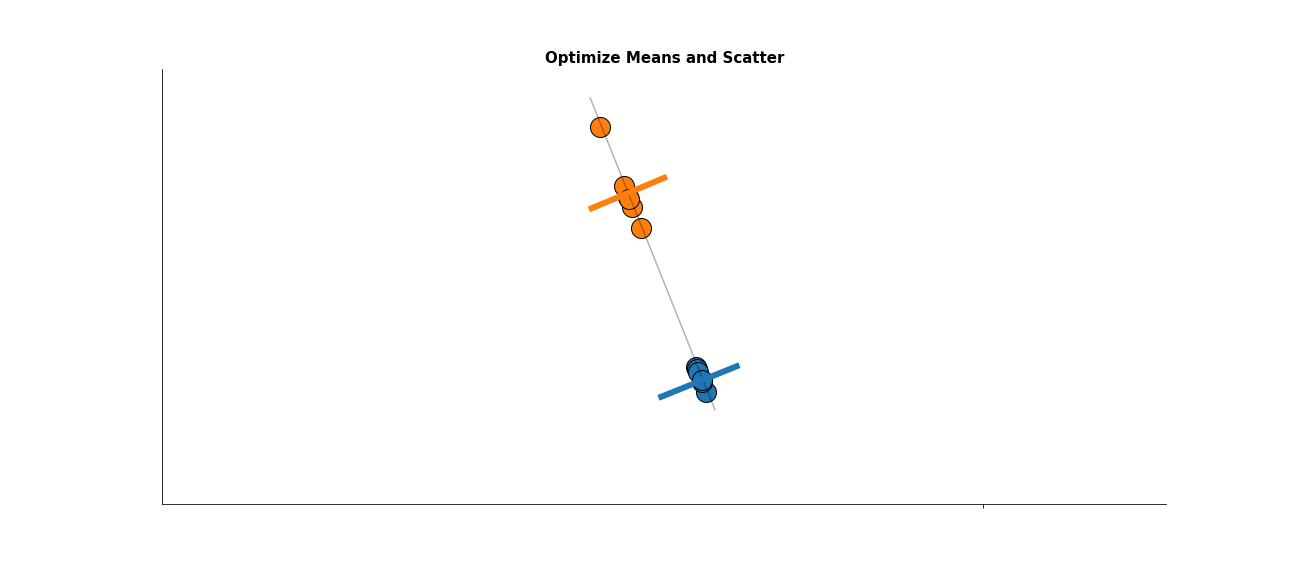

In [742]:
Image('LDAoptimize.png')

___
## <center> Mathematical Derivation

#### <center> First we need to derive the formula for the distance between the two projected centroids:

$$(\mu_1 - \mu_2)^2 = (v^Tm_1 - v^Tm_2) = (v^T(m_1 - m_2))^2$$

$$v^T(m_1 - m_2).(m_1 - m_2)^Tv$$

$$v^TS_Bv$$
___
So we know $(m_1 - m_2).(m_1 - m_2)^T$ can be thought as the covariance of the dataset whose members are the mean vectors of each class. 

Therefore, $S_B$ is our between class covariance matrix or using LDA terms it is our between-class scatter matrix.

Beacuase our covaraince matrix is simply derived from the inner product of $(m_1 - m_2).(m_1 - m_2)^T$ we know that the resultant matrix is square, symmetric and positive semi-definite.
___
#### <center> The formula for the variance of the projection:

$$s_j^2 = \sum_{x_i \in k_j}{}(a_j - \mu_j)^2$$

$$= \sum_{x_i \in k_j}{}(v^Tx_i - v^Tm_j)^2$$


$$= \sum_{x_i \in k_j}{}v^T(x_i - m_j).(x_i - m_j)^Tv$$

$$= v^T[\sum_{x_i \in k_j}{}(x_i - m_j).(x_i - m_j)^T]v$$

$$= v^TS_jv$$
$$$$
<center> Similarly, this within-class scatter is the expected covariance of each of the classes.
    
___


#### <center> Total within class scatter formula:

$$s_1^2 + s_2^2 = v^TS_1v+v^TS_2v$$

$$= v^T(S_1+S_2)v$$

$$= v^TS_wv$$


___
#### <center> Now we are left with the following optimization problem:

$$max\frac{v^TS_Bv}{v^TS_wv}$$
$$$$
<center> This can be solved by writing the formula as a generalized eigenvalue problem

___
# <center> Appendix

**Libraries**:
```
import numpy as np
from IPython.display import display
from IPython.display import Image
import matplotlib.pyplot as plt
```
**LDA example Plots**:
```
x = [1,1.2,1.4,2,3,4,2.5,3.75,4.5,4.65,5,5.5]
y = [5,1,1.5,3,2,4,5.2,4.7,4.7,4.75,2,5.2]
projection = set(zip(x,y))

fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(18,8))
plt.setp(ax1, xticks=[0], xticklabels=[''],
        yticks=[0], yticklabels=[''])
ax1.scatter(x[:6],y[:6],s = 70)
ax1.scatter(x[6:],y[6:],s = 70)
#ax1.scatter(9,0,c = 'm')

#ax1.text(-27, 0.0525, '$Likelihood = 0.052$', fontsize = 12,c = 'black')
#ax1.text(-27, 0.022, '$Likelihood = 0.021$', fontsize = 12,c = 'black')

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title('2-D Plot',fontweight="bold", size = 15)

# Providing subplots with titles
ax1.xaxis.set_tick_params(labelsize = 12)
ax1.axis('Square')


#Plot second graph
plt.setp(ax2, xticks=[0], xticklabels=[''],
        yticks=[0], yticklabels=[''])
ax2.scatter(x[:6],np.zeros(6),s = 70,edgecolors = 'black')
ax2.scatter(x[6:],np.zeros(6),s = 70,edgecolors = 'black')
ax2.scatter(x[:6],y[:6],s = 70,alpha = 0.3,c = 'tab:blue')
ax2.scatter(x[6:],y[6:],s = 70,alpha = 0.3,c = 'tab:orange')



# Remove top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Providing subplots with titles
ax2.xaxis.set_tick_params(labelsize = 12)
#ax2.legend(loc="upper right")
ax2.set_title('1-D Plot Bad Example',fontweight="bold", size = 15)
ax2.text(1.6, 0.4, 'Project onto x-Axis by Ignoring y-Axis', fontsize = 10,c = 'black')
ax2.axis('Square')


#Plot third graph
plt.setp(ax3, xticks=[0], xticklabels=[''],
        yticks=[0], yticklabels=[''])
ax3.scatter(x[:6],y[:6],s = 70,c = 'tab:blue',edgecolors = 'black')
ax3.scatter(x[6:],y[6:],s = 70,c = 'tab:orange',edgecolors = 'black')
ax3.plot([0,5.2],[0,5.5])

a = np.array([5.2,5.5])
for points in projection:
    beta = (a.T@points) / (a.T@a)
    ax3.plot([points[0], beta*a[0]],[points[1], beta*a[1]],'black',linestyle = '--',alpha = 0.3)
# Remove top and right spines
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.text(1.5, 1.8, 'Use Both Axis To Create New Axis', fontsize = 10,c = 'black',rotation = 46.5)
ax3.axis('Square')

# Providing subplots with titles
ax3.xaxis.set_tick_params(labelsize = 12)
#ax2.legend(loc="upper right")
ax3.set_title('1-D Plot LDA',fontweight="bold", size = 15)

fig.savefig('LDAexamplePlots.png')
```
**2D plot**:
```
x = [1.17,1.19,1.2,1.22,1.25,1.27,  1.245,1.255,   1.278,  1.288,  1.295, 1.31]
y = [1.04,1.03,1.05,1.062,1.063,1.07,  1.2,1.21,   1.23,  1.2,  1.228,1.29]
projection = set(zip(x,y))

fig,(ax1)= plt.subplots(figsize=(18,8))
plt.setp(ax1, xticks=[0], xticklabels=[''],
        yticks=[0], yticklabels=[''])
ax1.scatter(x[:6],y[:6],s = 300,edgecolors = 'black')
ax1.scatter(x[6:],y[6:],s = 300,edgecolors = 'black')
#ax1.scatter(9,0,c = 'm')

#ax1.text(-27, 0.0525, '$Likelihood = 0.052$', fontsize = 12,c = 'black')
#ax1.text(-27, 0.022, '$Likelihood = 0.021$', fontsize = 12,c = 'black')

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title('2-D Plot',fontweight="bold", size = 15)

# Providing subplots with titles
ax1.xaxis.set_tick_params(labelsize = 12)


fig.savefig('LDA2Dplot.png')
```
**Not good Separation**:
```
x = [1.17,1.19,1.2,1.22,1.25,1.27]
y = [1.04,1.03,1.05,1.062,1.063,1.07]
projection = set(zip(x,y))

x1 = [1.245,1.255,   1.278,  1.288,  1.295, 1.31]
y1 = [1.2,1.21,   1.23,  1.2,  1.228,1.29]

projection2 = set(zip(x1,y1))

fig,(ax2)= plt.subplots(figsize=(18,8))
plt.setp(ax2, xticks=[0], xticklabels=[''],
        yticks=[0], yticklabels=[''])
#ax1.scatter(x[:6],y[:6],s = 300,edgecolors = 'black')
#ax1.scatter(x[6:],y[6:],s = 300,edgecolors = 'black')
#ax1.scatter(9,0,c = 'm')
#ax1.plot([1.17,1.31],[1.05,1.2])
#ax1.text(-27, 0.0525, '$Likelihood = 0.052$', fontsize = 12,c = 'black')
#ax1.text(-27, 0.022, '$Likelihood = 0.021$', fontsize = 12,c = 'black')

# Remove top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_title('ONLY MAXIMIZE DISTANCE BETWEEN MEANS',fontweight="bold", size = 15)
ax2.plot([1.25,1.44],[0.125,0.144], 'black',alpha = 0.3)

a = np.array([1,0.1])
for points in projection:
    beta = (a.T@points) / (a.T@a)
    ax2.scatter([points[0], beta*a[0]],[points[1], beta*a[1]],c = 'tab:blue',edgecolors = 'black',s = 200)
    
a = np.array([1,0.1])
for points in projection2:
    beta = (a.T@points) / (a.T@a)
    ax2.scatter([points[0], beta*a[0]],[points[1], beta*a[1]],c = 'tab:orange',edgecolors = 'black',s = 200)
    


ax2.set_ylim([0.12,0.15])  
ax2.set_xlim([1.25,1.44])  

# Providing subplots with titles
ax2.xaxis.set_tick_params(labelsize = 12)

#adding ellipsoid
xcenter, ycenter = 1.35, 0.135
width, height = 0.01, 0.073
angle = 275

theta = np.deg2rad(np.arange(0.0, 360.0, 1.0))
x = 0.5 * width * np.cos(theta)
y = 0.5 * height * np.sin(theta)

rtheta = np.radians(angle)
R = np.array([
    [np.cos(rtheta), -np.sin(rtheta)],
    [np.sin(rtheta),  np.cos(rtheta)],
    ])


x, y = np.dot(R, [x, y])
x += xcenter
y += ycenter

ax.fill(x, y, alpha=0.2, facecolor='yellow',
        edgecolor='yellow', linewidth=1, zorder=1)

e1 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)

ax2.add_patch(e1)


ax2.plot([1.307,1.303],[0.128,0.133],'tab:blue',linewidth = 5)
ax2.plot([1.3927,1.388],[0.1365,0.1415],'tab:orange',linewidth = 5)
ax2.text(1.335, 0.136, 'Not Good Separation', fontsize = 15,c = 'black',rotation = 16)


fig.savefig('LDANotSep.png')
```
**Optimize**:
```
x = [1.17,1.19,1.2,1.22,1.25,1.27]
y = [1.04,1.03,1.05,1.062,1.063,1.07]
projection = set(zip(x,y))

x1 = [1.245,1.255,   1.278,  1.288,  1.295, 1.31]
y1 = [1.2,1.21,   1.23,  1.2,  1.228,1.29]

projection2 = set(zip(x1,y1))

fig,(ax1)= plt.subplots(figsize=(18,8))
#plt.setp(ax1, xticks=[0], xticklabels=[''],
  #      yticks=[0], yticklabels=[''])


# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title('Optimize Means and Scatter',fontweight="bold", size = 15)


a = np.array([-0.4,1])
for points in projection:
    beta = (a.T@points) / (a.T@a)
    ax1.scatter([points[0], beta*a[0]],[points[1], beta*a[1]],c = 'tab:blue',edgecolors = 'black',s = 400)
    

for points in projection2:
    beta = (a.T@points) / (a.T@a)
    ax1.scatter([points[0], beta*a[0]],[points[1], beta*a[1]],c = 'tab:orange',edgecolors = 'black',s = 400)
    
ax1.axis('equal')
ax1.set_ylim([0.4,0.7])  
ax1.set_xlim([-0.27,-0.17])  

ax1.plot([-0.185,-0.271],[0.465,0.68], 'black',alpha = 0.3)
ax1.plot([-0.222,-0.17],[0.474,0.495],'tab:blue',linewidth = 6)
ax1.plot([-0.27,-0.22],[0.604,0.625],'tab:orange',linewidth = 6)


fig.savefig('LDAoptimize.png')
```